# 03 - Linear Regression




친숙하게 알고 있는 Sin 그래프를 이용해서 <br>
Linear Regression 을 Scikit Learn Library 를 이용해 수행해보자

### Import Library

In [ ]:
#numpy 불러오기
#matplotlib 에서 pyplot 불러오기

import numpy as np
from matplotlib import pyplot as plt

### Prepare simple dataset

In [ ]:
#pi 불러오기
print(np.pi)

3.141592653589793


In [ ]:
# true data
N = 100

# linspace = 선형 구간 혹은 로그 구간을 지정한 구간의 수만큼 분할한다.
# 시작, 끝(포함), 갯수
# reshape = 기존 데이터는 유지하고 차원과 형상을 바꿈.
# ex) 3개의 행과 4개의 열로 구성된 배열로 재설정하고 싶으면 reshape(3, 4)
# reshape(N,1) = N개 행, 1개 열

# x 값은 0/~2*pi 이고 100만큼 분할
# y 값은 -1~1 사이의 값
X = np.linspace(0,2*np.pi,N).reshape(-1,1)
print(X[:5])

[[0.        ]
 [0.06346652]
 [0.12693304]
 [0.19039955]
 [0.25386607]]


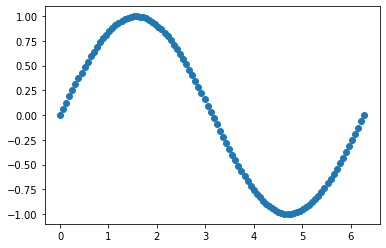

In [ ]:
# plot 그리기

# y는 X의 sin 
y = np.sin(X)
#plt.plot(X,y)
# X,y를 산점도로 그리기
plt.scatter(X,y)
plt.show()


#### Noise 만들어주기
- rand (0과 1사이의 난수를 발생시키는) 명령어를 사용

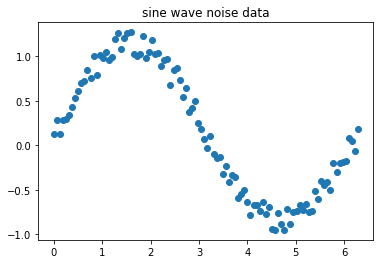

In [ ]:
#seed를 1로 고정
np.random.seed(1)
# y를 0~1사이 임의값에 0.3 곱한값을 100 * 1행렬로 만들고 더해주기
y += 0.3*np.random.rand(N,1)
# X,y의 산점도 그리기
# 제목은 sine wave noise data
plt.scatter(X,y)
plt.title('sine wave noise data')
plt.show()

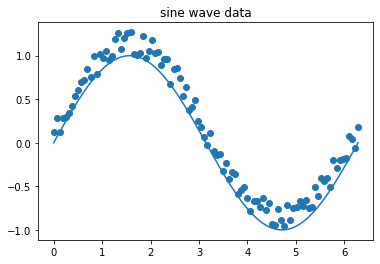

In [ ]:
# 기존 그래프와 함께 plotting

#y값을 X의 sin값으로 설정
# X,y의 그래프 그리기
y = np.sin(X)
plt.plot(X,y)

# add noise
#seed값을 1로 고정
np.random.seed(1)
# y를 0~1사이 임의값에 0.3 곱한값을 100 * 1행렬로 만들고 더해주기
y += 0.3*np.random.rand(N,1)

# X,y의 산점도 그리기
# sine wave data 제목 설정
plt.scatter(X,y)
plt.title('sine wave data')
plt.show()

#### Shuffle Dataset

In [ ]:
# shuffle data
# seed 값을 10으로 고정
np.random.seed(10)

# N은 40이므로 1~40까지의 수를 섞어준다 (permutation(N))
idx = np.random.permutation(N)
print(idx)

[19 14 43 37 66  3 79 41 38 68  2  1 60 53 95 74 92 26 59 46 90 70 50 44
 76 55 21 61  6 63 42 34 84 52 35 39 45  4  5 48 32 20 83 58 47 80 17 67
 81  7 87 97 98 99 24 10 96 86 56 71 23 22 91 94 18 27 88 57 31 65 12 82
 30 75 25 13 69 77 85 51 49 78 72 33 62 54 11 16 36 40  0 73  8 29 93 89
 28 64 15  9]


In [ ]:
#인덱스 값을 shuffle_X,y에 저장
shuffle_X = X[idx]
shuffle_y = y[idx]

# shuffle_X,y를 3열까지만 출력
print(shuffle_X[:3])
print(shuffle_y[:3])

[[1.20586385]
 [0.88853126]
 [2.72906028]]
[[0.99357831]
 [0.78436274]
 [0.63771433]]


### Split train & test (3:1 의 비율)

In [ ]:
# 3:1 의 비율로 train test 를 나눔
# N값의 0.75를 n에 저장
n = int(N * (3/4))

# train data
# shuffle_X,y를 n열까지만큼 X_train, y_train에 저장
X_train = shuffle_X[:n]
y_train = shuffle_y[:n]

In [ ]:
# test data
# shuffle을 n열부터 끝까지 X_test, y_test에 저장
X_test = shuffle_X[n:]
y_test = shuffle_y[n:]

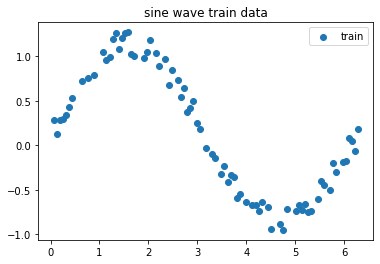

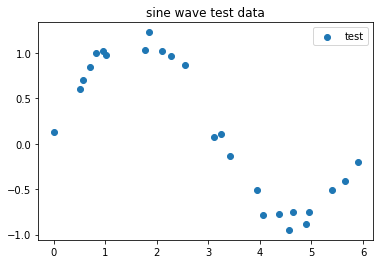

In [ ]:
# plot
# X_train, y_train의 산점도 그리기 , 점 이름은 train
# 범례 표현하기
# 제목은 'sine wave train data'
plt.scatter(X_train, y_train, label = 'train')
plt.legend()
plt.title('sine wave train data')
plt.show()

# X_test, y_test의 산점도 그리기, 점 이름은 test
# 범례 표현하기
# 제목은 'sine wave test data'
plt.scatter(X_test, y_test,label = 'test')
plt.legend()
plt.title('sine wave test data')
plt.show()

### Perform Linear Regression
- compute W using sklearn library

In [ ]:
# sklearn.linear_model에서 linearregression 불러오기
from sklearn.linear_model import LinearRegression

# reg변수에 선형회귀함수 넣어주기
# X_train, y_train 학습시키기
reg = LinearRegression()
reg.fit(X_train, y_train)

# w0 (상수값) 출력
# w1 (회귀계수) 출력
print('w0: ', reg.intercept_)
print('w1: ', reg.coef_)

w0:  [1.02083628]
w1:  [[-0.27359283]]


### X data 을 이용해서 Prediction 을 하기 위해서는 .predict 를 이용

In [ ]:
# Pred 변수에 X_train 예측한 값들을 저장
Pred = reg.predict(X_train)

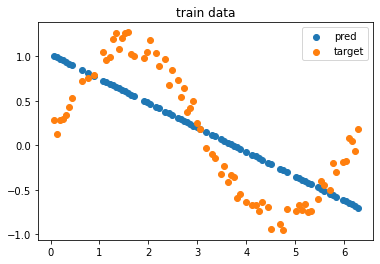

In [ ]:
# 그래프 그릴자리 확보
# X_train과 Pred의 산점도 그리기, 점 제목은 pred
# X_train과 y_train의 산점도, 점 제목은 , target
# 범례 그리기
# 제목은 train data

plt.figure()
plt.scatter(X_train, Pred, label = 'pred')
plt.scatter(X_train, y_train, label = 'target')
plt.legend()
plt.title('train data')
plt.show()

Text(0.5, 1.0, 'test data')

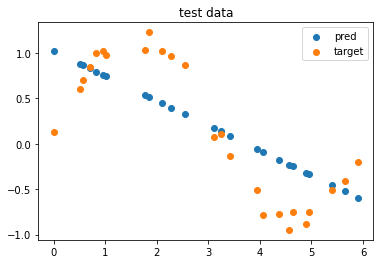

In [ ]:
# 그래프 그릴자리 확보
# X_test와 X_test 예측한 값의 산점도 그리기, 점 제목은 pred
# X_test와 y_test의 산점도, 점 제목은 , target
# 범례 그리기
# 제목은 test data

plt.figure()
plt.scatter(X_test, reg.predict(X_test), label = 'pred')
plt.scatter(X_test, y_test, label = 'target')
plt.legend()
plt.title('test data')

## Practice
 - Another Dataset
 - 임의의 function 을 지정한 후 linear regression 을 수행
 
$ y = 2x + 5 $

In [ ]:
# X값을 0~1사이 임의의 수를 100 by 1 만큼 뽑고 3을 곱한 것으로 설정
# y는 2x + 5 로 설정
X = 3*np.random.rand(100,1)
y = 2*X + 5

# add_noise
# y_noise에 y값에 0~1사이 임의의 수를 100 by 1만큼 뽑고 더한 것을 저장
y_noise = y + np.random.rand(100, 1) # noise data 를 가진 y 값

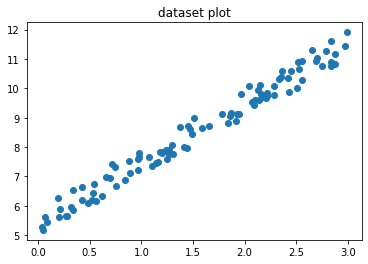

In [ ]:
# X와 y_noise의 산점도 그리기
# 제목은 dataset plot으로 설정
plt.scatter(X, y_noise)
plt.title('dataset plot')
plt.show()

#### 아까와 같은 방식으로 풀어보자

In [ ]:
#reg에 선형회귀 함수 저장
# X_train, y_train 학습시키기
# 상수, 회귀계수 출력

reg = LinearRegression()
reg.fit(X, y_noise)

print('w0: ', reg.intercept_)
print('w1: ', reg.coef_)

w0:  [5.37595836]
w1:  [[2.04665497]]


$ {y = 2.027286x + 5.46443632} $

$ {y = 2x + 5} $

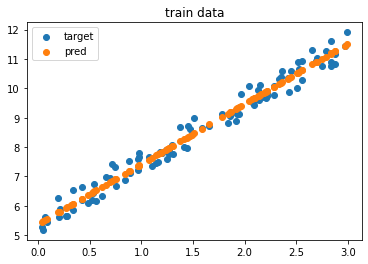

In [ ]:
# 그래프 그릴 공간 확ㅂ
# X, y_noise의 산점도 그리기, 점 이름은 target
# X와 X 예측값 산점도 그리기, 점 이름은 pred
# 범례 그리기
# 제목은 train data

plt.figure()
plt.scatter(X, y_noise, label = 'target')
plt.scatter(X,reg.predict(X), label = 'pred')
plt.legend()
plt.title('train data')
plt.show()

***

## Polynomial Regression

#### Anonther Dataset

$ y = x^2 + 3x + 5 $

In [ ]:
# seed 값을 5로 고정
np.random.rand(5)


N = 100
# 기존 x 범위는 0~6 사이였으나 -3 이 있으므로 -3~3 이 범위로 바뀌게 된다.
# X 값을 0~1 사이 임의의수를 100 by 1만큼 뽑고 6을 곱한뒤 3을 빼준다
# y 값을 x^2 + 3x + 5 로 설정
X = 6*np.random.rand(N,1) - 3
y = X ** 2 + 3*X + 5

noise 추가

In [ ]:
#  0~1사이 임의의 수 100 by 1만큼 뽑은 것을 3배 한뒤 y 값에 더하고 이를 y_noise 변수에 저장
y_noise = y + 3*np.random.rand(N,1)

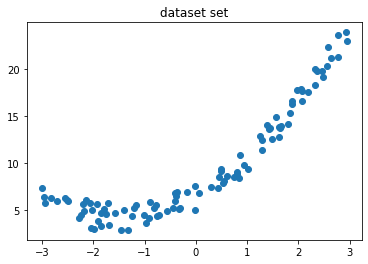

In [ ]:
# X와 y_noise에 산점도 그리기
# 제목은 dataset set

plt.scatter(X, y_noise)
plt.title('dataset set')
plt.show()

In [ ]:
# 회귀분석을 할 수 있는 함수 불러오기
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y_noise)

print('w0: ', reg.intercept_)
print('w1: ',reg.coef_)

w0:  [9.61999866]
w1:  [[2.96449714]]


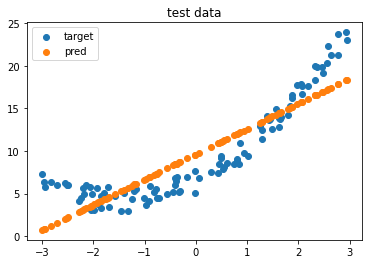

In [ ]:
# 그래프 그릴 공간 만들기
# X, y_noise의 산점도 그리기, 점 이름은 target
# X, X 예측값의 산점도 그리기, 점 이름은 pred
# 범례 설정
# 제목 test data

plt.figure()
plt.scatter(X,y_noise, label = 'target')
plt.scatter(X,reg.predict(X), label = 'pred')
plt.legend()
plt.title('test data')
plt.show()

 - 위의 예시에서 보듯, Sin Function 그래프를 1차원 직선으로 나타내기엔 무리가 있음
 - X 의 feature 를 더 추가해주어서 좀 더 정확한 Linear Regression 을 수행

### 좀 더 자세히 살펴보자

위의 예시에서 풀어왔던 Linear Regression 의 경우

$ y_{1} = w_{1}x_{1} + w_{0} $

(여기서 $w_{1}$ 은 reg.coef_ 이고 $w_{0}$ 은 reg.intercept_ 로 구했음) <br>
와 같은 간단한 직선 방정식의 형태를 가정하고 풀었던 과정이었다.
***
이것은 우리가 가지고 있는 X 의 feature 가 하나 밖에 있지 않았기 때문이다.<br>

하지만 X 의 feature 를 제곱, 세제곱의 형태로 임의로 늘려준다면 방정식은 1차원의 직선이 아닌, 아래와 같이 고차원의 식으로 변할 수 있다.

$ y_{1} = w_{n}x_{1}^n + w_{n-1}x_{1}^{n-1} + ... + w_{2}x_{1}^2 + w_{1}x_{1}^1 + w_{0} $

즉, 기존의 X 를 제곱, 세제곱의 형태를 만들어서 feature 를 추가해준다면, 좀 더 정확한 Model 을 얻게 될 것이다.

****
#### Library 를 이용해서 feature 를 추가해보자.

Feature 를 추가 할 때는 PolynomialFeatures 를 사용<br>
제곱, 세제곱 등의 계산이 가능

In [ ]:
# feature 추가할 수 있는 함수 불러오기
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# transform from (x1, x2) to (1, x1, x2, x1^2, x1*x2, x2^2) ## default
# transform from (x1, x2) to (x1, x2, x1^2, x1*x2, x2^2) ## include_bias = False

# polynomial 변수에 feature를 2개로 추가하고 inclued_bias를 False로 설정해서 저장
# new_feature 변수에 형태변환한 X를 학습시키기 
polynomial = PolynomialFeatures(degree = 2, include_bias = False)
new_feature = polynomial.fit_transform(X)

In [ ]:
# new_feature 확인
new_feature

array([[-9.10008034e-01,  8.28114622e-01],
       [ 5.47333868e-01,  2.99574363e-01],
       [ 1.65007878e+00,  2.72275998e+00],
       [ 7.48526803e-01,  5.60292375e-01],
       [-2.04191440e+00,  4.16941442e+00],
       [ 2.36257592e+00,  5.58176497e+00],
       [ 1.38354760e+00,  1.91420395e+00],
       [-1.33918844e-02,  1.79342568e-04],
       [ 8.61841316e-01,  7.42770455e-01],
       [ 5.68505658e-02,  3.23198684e-03],
       [-1.99075105e+00,  3.96308975e+00],
       [ 8.48788635e-01,  7.20442147e-01],
       [ 2.92900658e+00,  8.57907953e+00],
       [ 1.62197618e+00,  2.63080672e+00],
       [-1.91111275e+00,  3.65235193e+00],
       [-2.28138588e+00,  5.20472151e+00],
       [ 2.58205106e+00,  6.66698767e+00],
       [ 2.46058460e+00,  6.05447656e+00],
       [ 1.49510796e+00,  2.23534781e+00],
       [ 1.56318924e+00,  2.44356061e+00],
       [-2.14274521e+00,  4.59135705e+00],
       [ 1.87166515e+00,  3.50313043e+00],
       [-1.84632423e+00,  3.40891315e+00],
       [-2.

In [ ]:
# 기존 x[0], feature가 추가된 x[0] 출력
print('기존의 x[0]:',X[0])
print('Feature가 추가된 x[0]:',new_feature[0])

기존의 x[0]: [-0.91000803]
Feature가 추가된 x[0]: [-0.91000803  0.82811462]


In [ ]:
print(-1.66804097*-1.66804097)

2.782360677598541


In [ ]:
# new_feature 모양 확인하기
# new_feature 5열까지 확인

print(new_feature.shape)
print(new_feature[:5])

(100, 2)
[[-0.91000803  0.82811462]
 [ 0.54733387  0.29957436]
 [ 1.65007878  2.72275998]
 [ 0.7485268   0.56029237]
 [-2.0419144   4.16941442]]


##### Feature 를 추가한 상태에서 LinearRegression 을 다시 사용

In [ ]:
# 회귀분석 할 수 있는 함수 불러오기
from sklearn.linear_model import LinearRegression

# reg에 회귀분석 함수 저장
# new_feature와 y_noise 학습
reg = LinearRegression()
reg.fit(new_feature, y_noise)

# y = w2x^2 + w1x + w0
# 상수, 회귀계수 출력
print('w0:',reg.intercept_)
print('w1:',reg.coef_)

w0: [6.62414592]
w1: [[2.97325524 1.00534064]]


$ {y = x^2 + 3x + 5} $

$ {y = 0.92x^2 + 3.02x + 6.82} $

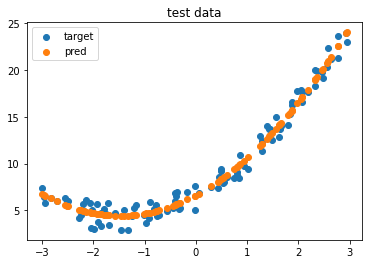

In [ ]:
# 그래프 그릴 공간 만들기
# X, y_noise의 산점도 그리기, 점이름 = target
# X, new_feature 예측값 산점도 그리기, 점이름 = pred
# 범례
# 제목 test data

plt.figure()
plt.scatter(X, y_noise, label = 'target')
plt.scatter(X, reg.predict(new_feature), label = 'pred')
plt.legend()
plt.title('test data')
plt.show()

# Practice1

## Polynomial Regression

x 의 범위는 -2~2 

$ {y = 3x^3 + 2x^2 + 7x + 5} $

In [ ]:
np.random.seed(10)

N = 100
X = 4 * np.random.rand(N,1)-2 # -2~2 로 범위를 만들기 위해 -2 를 끝에 붙임
y = 3*X**3 + 2*X**2 + 7*X + 5

y_noise = y + 10*np.random.rand(N, 1)

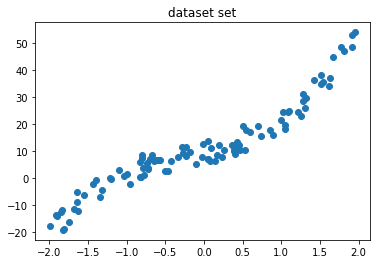

In [ ]:
plt.scatter(X, y_noise)
plt.title('dataset set')
plt.show()

In [ ]:
# polynomial 변수에 feature를 3개로 추가하고 inclued_bias를 False로 설정해서 저장
# new_feature_three 변수에 형태변환한 X를 학습시키기 
polynomial = PolynomialFeatures(degree = 3, include_bias = False)
new_feature_three = polynomial.fit_transform(X)

# 기존 x[0], feature가 추가된 x[0] 출력
print('기존의 X[0]:', X[0])
print('Feature가 추가된 X[0]:',new_feature_three[0])

기존의 X[0]: [1.08528257]
Feature가 추가된 X[0]: [1.08528257 1.17783826 1.27828734]


In [ ]:
# 회귀분석 할 수 있는 함수 불러오기
from sklearn.linear_model import LinearRegression

# reg에 회귀분석 함수 저장
# new_feature와 y_noise 학습
reg = LinearRegression()
reg.fit(new_feature_three, y_noise)

# 상수, 회귀계수 출력
print('w0:',reg.intercept_)
print('w1:',reg.coef_)


w0: [9.18157997]
w1: [[6.35064075 2.3300474  3.20666863]]


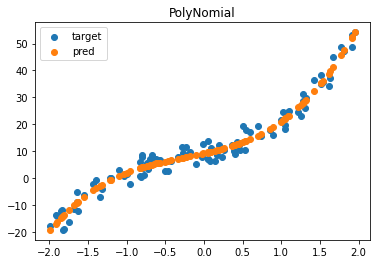

In [ ]:
# 그래프 그릴 공간 만들기
# X, y_noise의 산점도 그리기, 점이름 = target
# X, new_feature_three 예측값 산점도 그리기, 점이름 = pred
# 범례
# 제목 PolyNomial

plt.figure()
plt.scatter(X, y_noise, label='target')
plt.scatter(X, reg.predict(new_feature_three), label='pred')

plt.legend()
plt.title('PolyNomial')
plt.show()

$ {y = 3x^3 + 2x^2 + 7x + 1} $

$ {y = 3.20x^3 + 2.33x^2 + 6.35x + 9.18} $

# Practice 2

### 앞서 했던 sin 함수를 1차 그래프가 아닌 다차원 그래프로 정확한 예측을 해보자

In [ ]:
N = 100

X = np.linspace(0,2*np.pi, N).reshape(-1,1)
X[:5]

array([[0.        ],
       [0.06346652],
       [0.12693304],
       [0.19039955],
       [0.25386607]])

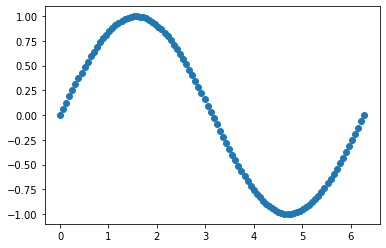

In [ ]:
# plot 그리기

y = np.sin(X)
#plt.plot(X,y)
plt.scatter(X,y)
plt.show()


In [ ]:
polynomial = PolynomialFeatures(degree = 3, include_bias = False)
sin_new_feature = polynomial.fit_transform(X)

In [ ]:
print("기존의 x[0]:",X[1])
print("Feature가 추가된 x[0]:", sin_new_feature[1])

기존의 x[0]: [0.06346652]
Feature가 추가된 x[0]: [0.06346652 0.004028   0.00025564]


In [ ]:
sin_new_feature

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.34665183e-02, 4.02799894e-03, 2.55643068e-04],
       [1.26933037e-01, 1.61119958e-02, 2.04514455e-03],
       [1.90399555e-01, 3.62519905e-02, 6.90236284e-03],
       [2.53866073e-01, 6.44479830e-02, 1.63611564e-02],
       [3.17332591e-01, 1.00699973e-01, 3.19553835e-02],
       [3.80799110e-01, 1.45007962e-01, 5.52189027e-02],
       [4.44265628e-01, 1.97371948e-01, 8.76855724e-02],
       [5.07732146e-01, 2.57791932e-01, 1.30889251e-01],
       [5.71198664e-01, 3.26267914e-01, 1.86363797e-01],
       [6.34665183e-01, 4.02799894e-01, 2.55643068e-01],
       [6.98131701e-01, 4.87387872e-01, 3.40260924e-01],
       [7.61598219e-01, 5.80031847e-01, 4.41751222e-01],
       [8.25064737e-01, 6.80731821e-01, 5.61647821e-01],
       [8.88531256e-01, 7.89487792e-01, 7.01484579e-01],
       [9.51997774e-01, 9.06299761e-01, 8.62795355e-01],
       [1.01546429e+00, 1.03116773e+00, 1.04711401e+00],
       [1.07893081e+00, 1.16409

### Shuffle & Split train, test

In [ ]:
# shuffle data
idx = np.random.permutation(N)

shuffle_X = sin_new_feature[idx]
shuffle_y = y[idx]

print(shuffle_X[:3])
print(shuffle_y[:3])

[[1.3962634  1.94955149 2.72208739]
 [0.19039955 0.03625199 0.00690236]
 [0.25386607 0.06444798 0.01636116]]
[[0.98480775]
 [0.18925124]
 [0.25114799]]


In [ ]:
n = int(N * (3/4))

# train data
X_train = shuffle_X[:n]
y_train = shuffle_y[:n]

# test data
X_test = shuffle_X[n:]
y_test = shuffle_y[n:]

### Perform Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print('w0: ', reg.intercept_)
print('w1: ', reg.coef_)

w0:  [-0.21537653]
w1:  [[ 1.90841129 -0.87625616  0.09270284]]


### Plotting

In [ ]:
Pred = reg.predict(X_train)

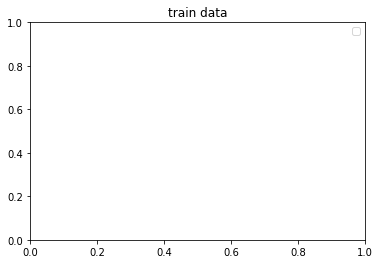

In [ ]:
plt.figure()


plt.legend()
plt.title('train data')
plt.show()

### Test data 로 plot

In [ ]:
test_Pred = reg.predict(X_test)

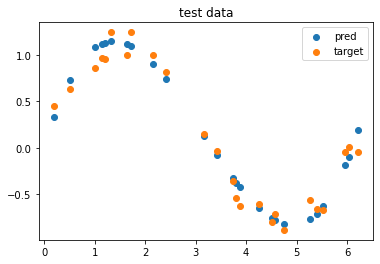

In [ ]:
plt.figure()

plt.legend()
plt.title('test data')
plt.show()

### Train, Test data 로 plot

In [ ]:
X_all = shuffle_X[:]
y_all = shuffle_y[:]

all_Pred = reg.predict(X_all)

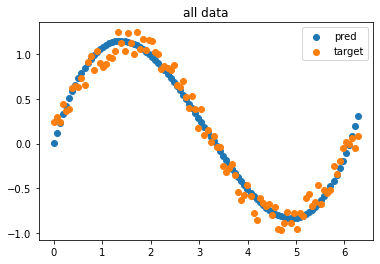

In [ ]:
plt.figure()
plt.scatter(X_all[:,0], all_Pred, label='pred')
plt.scatter(X_all[:,0], y_all, label='target')
plt.legend()
plt.title('all data')
plt.show()